In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from c_an_utilis import *
import sys
sys.path.append('../')
from helpers import *

data_path = './../../../data'

In [2]:
advocate_dir = os.path.join(data_path, 'BeerAdvocate')
exp_categories = get_exp_categories(data_path) + ['expertness_score']
rev_with_scores = pd.read_pickle(os.path.join(advocate_dir, 'rev_w_scores.pkl'))
rev_with_scores['date'] = pd.to_datetime(rev_with_scores['date'])
adv_beers = pd.read_csv(os.path.join(advocate_dir, 'beers_BA_clean.csv'))
users_ba = pd.read_csv(os.path.join(advocate_dir, 'users_BA_clean.csv'))

In [3]:
rev_with_scores.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'review', 'lang_tag', 'stems', 'flavor',
       'mouthfeel', 'brewing', 'technical', 'appearance', 'off_flavors',
       'expertness_score'],
      dtype='object')

In [4]:
complete_beer = pd.merge(adv_beers, rev_with_scores, on='beer_id')

In [5]:
col_to_keep = ['style_x'] + exp_categories
beer_gr = complete_beer[col_to_keep].groupby('style_x')

In [46]:
style_size = beer_gr.size()
style_size.sort_values(ascending=False).head(20)

style_x
American IPA                        248757
American Double / Imperial IPA      182230
American Double / Imperial Stout    117668
American Pale Ale (APA)             106650
Russian Imperial Stout               80640
American Porter                      78178
Saison / Farmhouse Ale               76293
American Amber / Red Ale             69036
Fruit / Vegetable Beer               52473
American Wild Ale                    52260
Belgian Strong Dark Ale              50009
Tripel                               42475
Belgian Strong Pale Ale              42033
Witbier                              41948
American Strong Ale                  41428
American Brown Ale                   40183
Hefeweizen                           39091
American Stout                       39076
American Barleywine                  37933
American Adjunct Lager               36285
dtype: int64

## Analysis on IPA

In [24]:
Ipa_name = 'American IPA'
rev_IPA, complete_IPA = get_style_dfs(Ipa_name, complete_beer, users_ba, exp_categories)

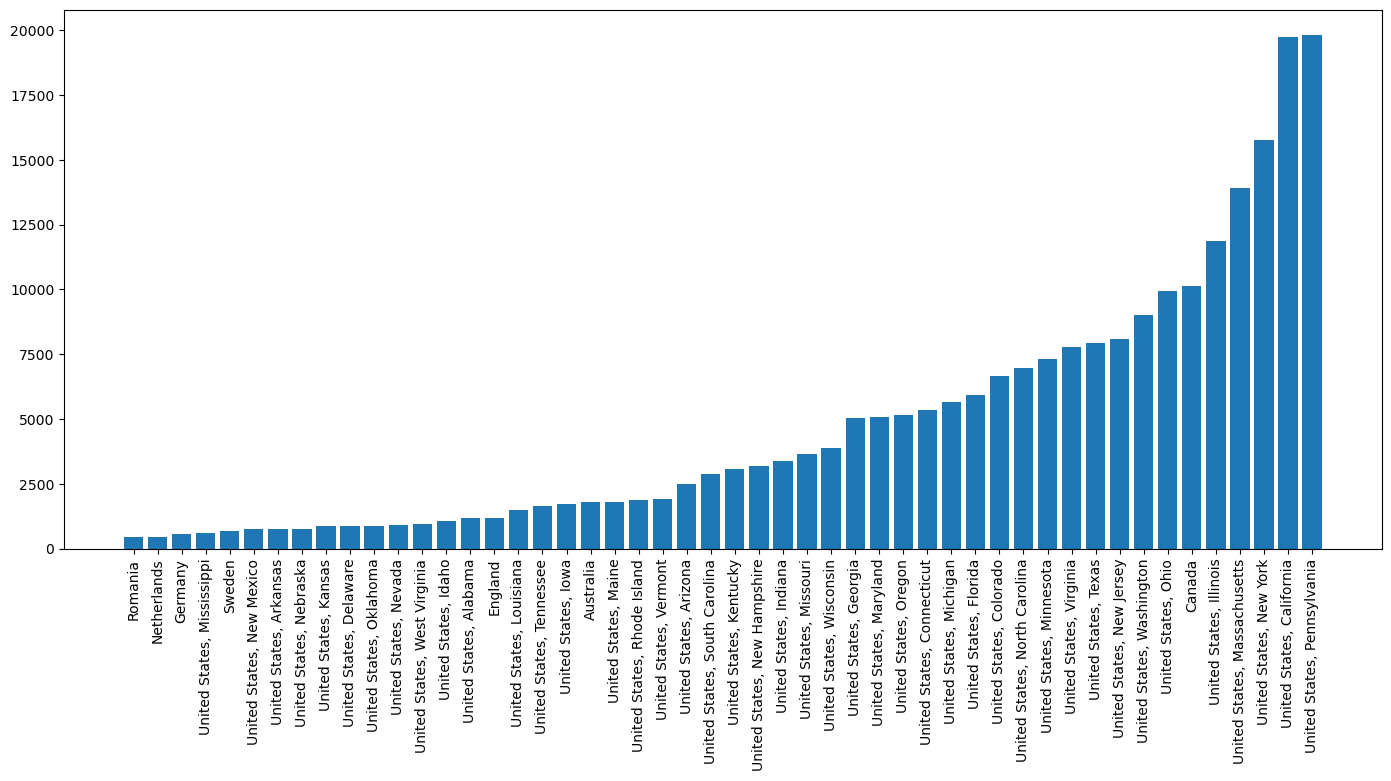

In [25]:
plot_country_distrbution(complete_IPA, threshold=400)

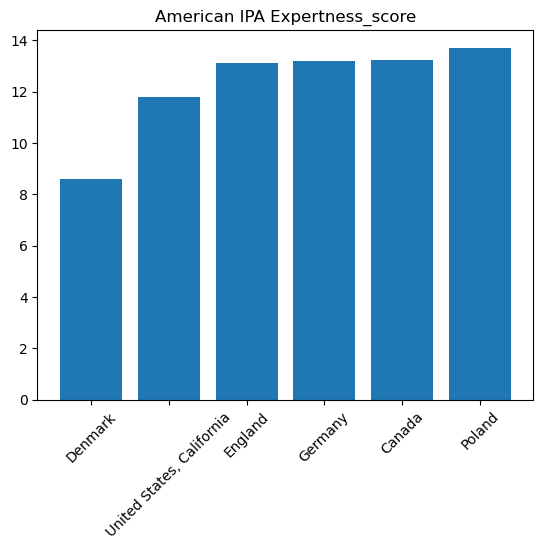

In [26]:
sel_countries = ['Canada', 'Denmark', 'England', 'United States, California', 'Germany', 'Poland']
plot_country_exp_score(complete_IPA, sel_countries, style=Ipa_name)

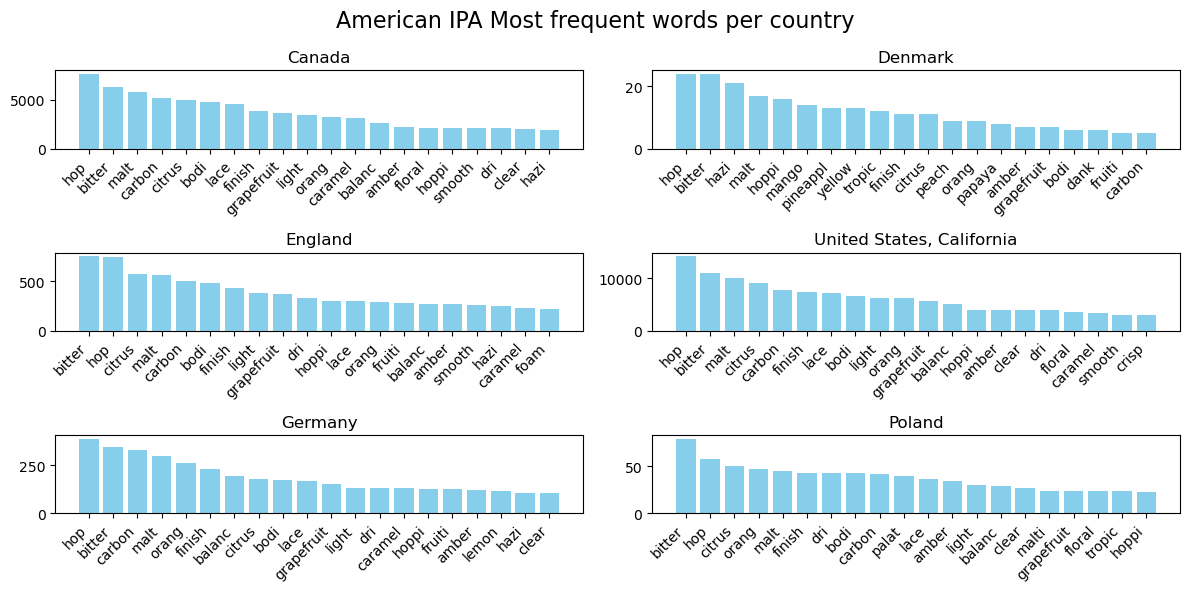

In [27]:
count_words_IPA = get_count_words(complete_IPA, sel_countries)
plot_count_words(count_words_IPA, style=Ipa_name)

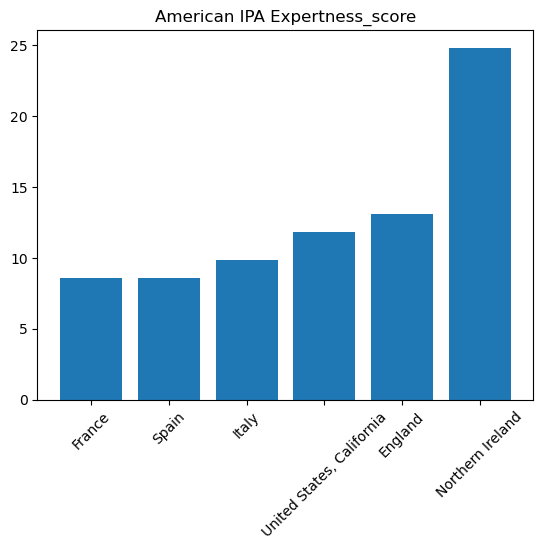

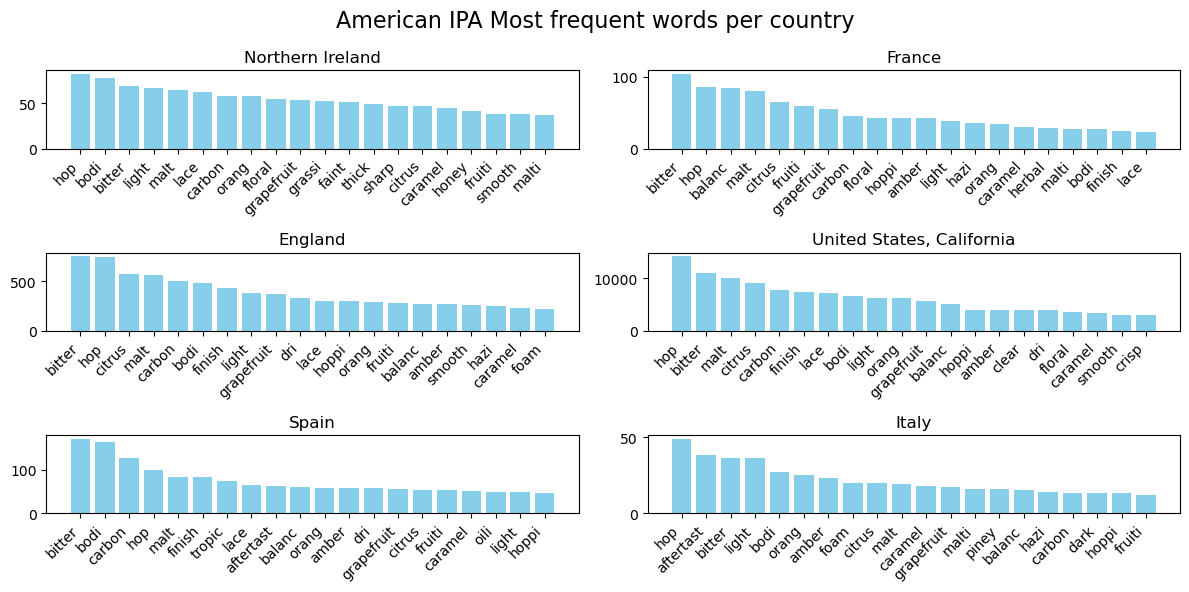

In [28]:
sel_2 = ['Northern Ireland', 'France', 'England', 'United States, California', 'Spain', 'Italy']
count_words_IPA = get_count_words(complete_IPA, sel_2)
plot_country_exp_score(complete_IPA, sel_2, style=Ipa_name)
plot_count_words(count_words_IPA, style=Ipa_name)

## Analysis on Imperial Stout

In [33]:
IS_name='American Double / Imperial Stout'
rev_IS, complete_IS = get_style_dfs(IS_name, complete_beer, users_ba, exp_categories)

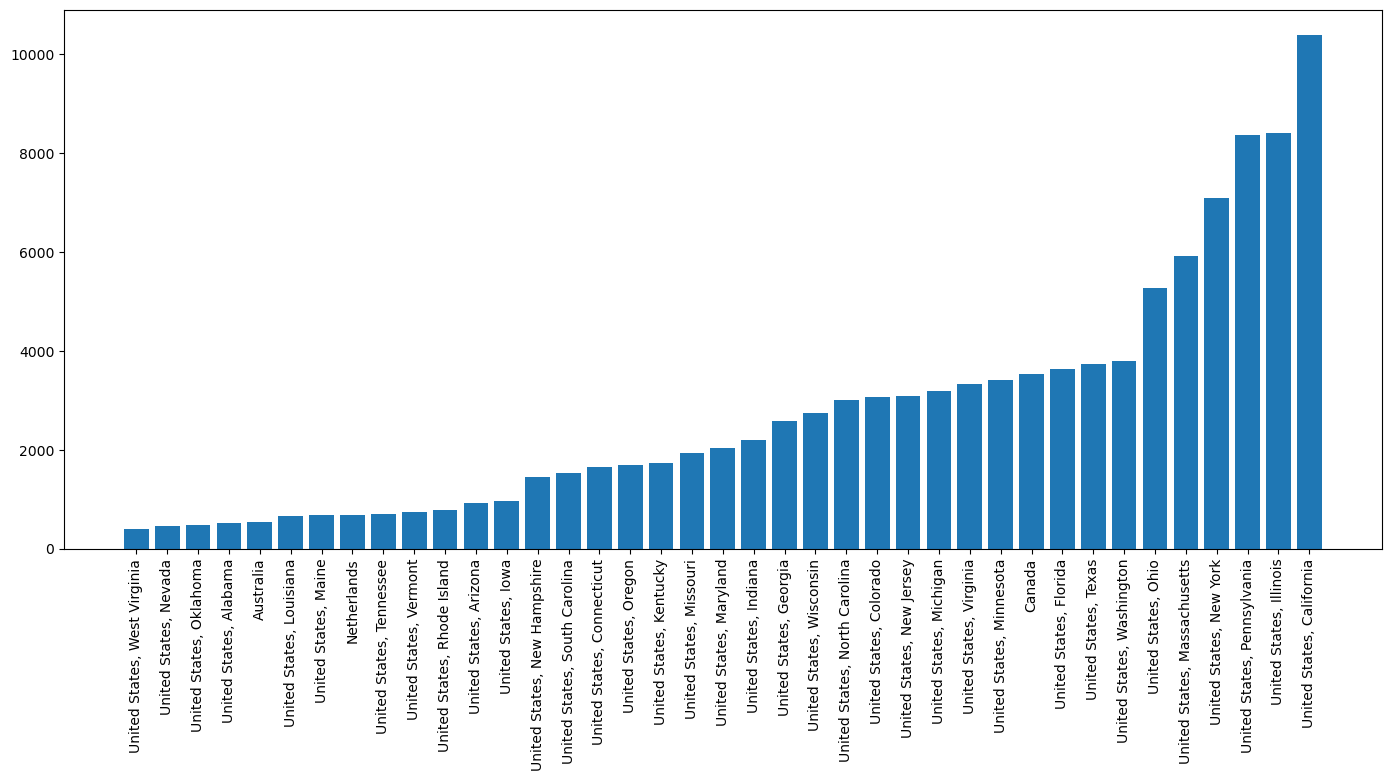

In [35]:
plot_country_distrbution(complete_IS, threshold=400)

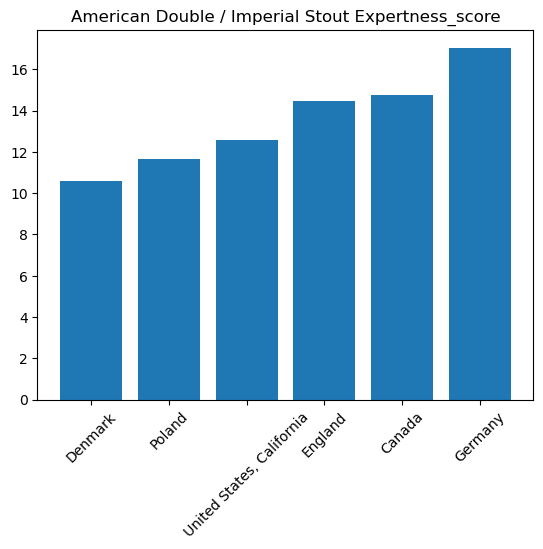

In [36]:
plot_country_exp_score(complete_IS, sel_countries, style=IS_name)

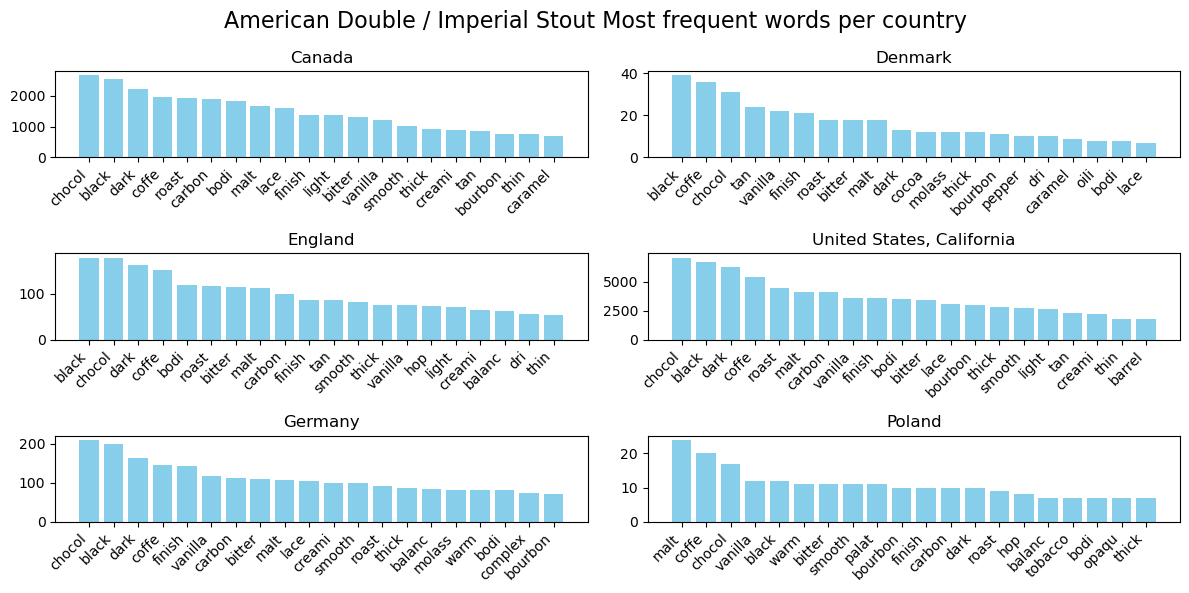

In [37]:
count_words_IS =get_count_words(complete_IS, sel_countries)
plot_count_words(count_words_IS, style=IS_name)

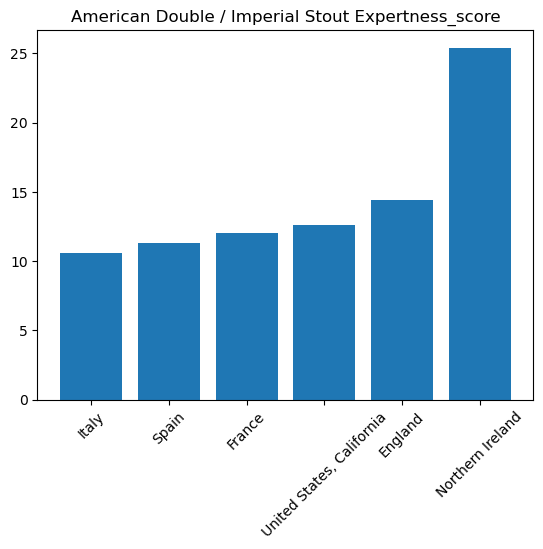

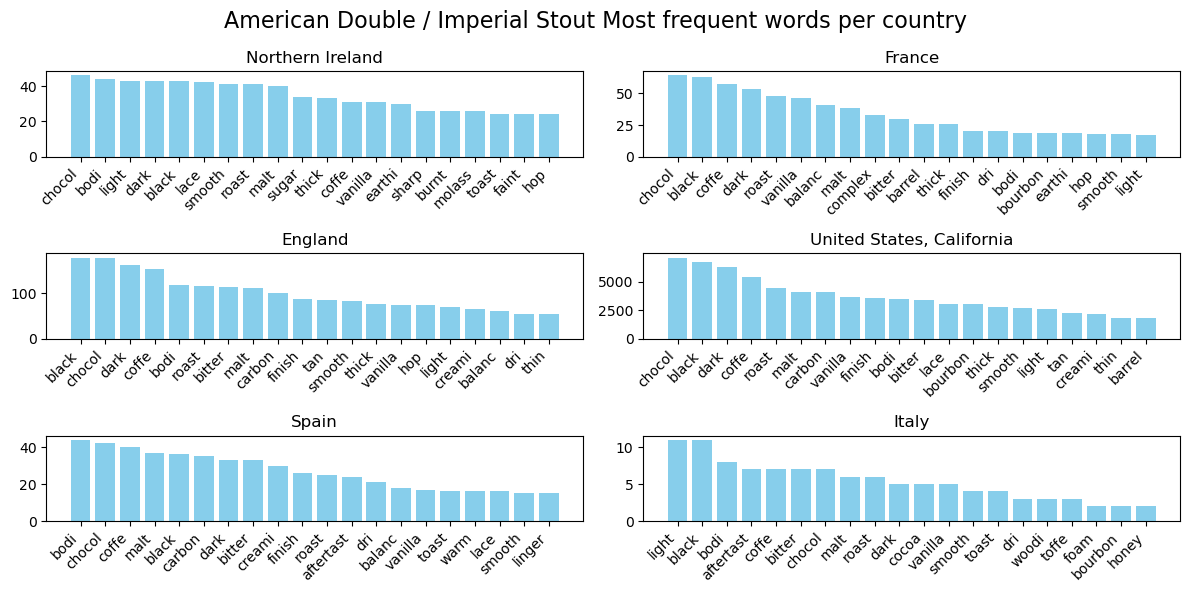

In [38]:
count_words_IS = get_count_words(complete_IS, sel_2)
plot_country_exp_score(complete_IS, sel_2, style=IS_name)
plot_count_words(count_words_IS, style=IS_name)